### EA614 2020.1
____
##### Aluno: Marcos Diaz 
##### RA: 221525

____
*Parte Computacional*



##### (a) Coeficientes da série 
![(a)](EFC2a.jpg)

##### (b) Função que gera as séries de fourier para N harmônicas
Preparação:

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgn

Para um período de T=4s:

In [194]:
T0 = 4
w0 = 2*np.pi/T0

In [195]:
# exponenciais complexas
c_exp = lambda k, t: np.exp(1j*k*w0*t)

In [196]:
# coeficientes
a_k = lambda k : 0 if k==0 else (1j*(-1)**k)/(k*np.pi)

Foi observado que a exponencial complexa implementada pelo NumPy gera erros de aproximação numéricos:

In [197]:
# exp(j*pi) = -1
np.exp(np.pi*1j)

(-1+1.2246467991473532e-16j)

Série da dente de serra.
Como o erro é pequeno, tomamos a parte real da série de fourier ao final:

In [198]:
# gerador de representações: gera representações com N harmônicas
x_N = lambda N : lambda t : np.real(sum([a_k(k)*c_exp(k,t) for k in range(-N, N+1)]))

##### (c) Gráficos
Função original:

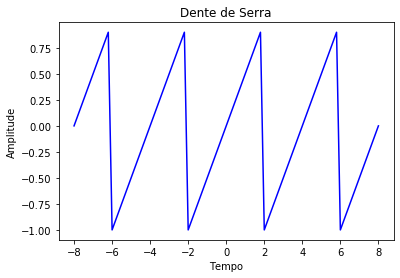

In [199]:
# domínio
lim = 8
num = 81
T = np.linspace(-lim, lim, num) 

# onda dente de serra
plt.title("Dente de Serra")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
x = sgn.sawtooth((np.pi/2)*(T-2))
go = plt.plot(T, x, 'b')

Gráficos comparando a onda e suas representações com N harmônicas (original em azul; representação em vermelho):

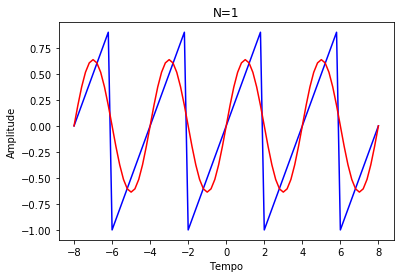

In [200]:
# N=1
x_1 = x_N(1)
X_1 = [x_1(t) for t in T]

plt.title("N=1")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
go1 = plt.plot(T, x, 'b')
g1 = plt.plot(T, X_1, 'r')

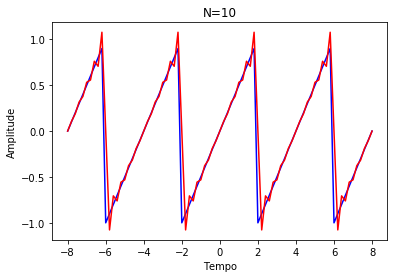

In [201]:
# N=10
x_10 = x_N(10)
X_10 = [x_10(t) for t in T]

plt.title("N=10")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
go2 = plt.plot(T, x, 'b')
g2 = plt.plot(T, X_10, 'r')

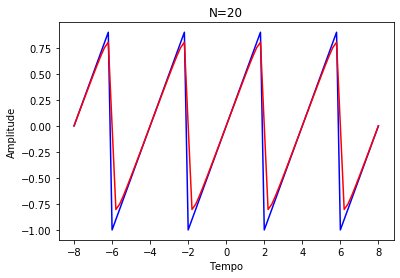

In [202]:
# N=20
x_20 = x_N(20)
X_20 = [x_20(t) for t in T]

plt.title("N=20")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
go3 = plt.plot(T, x, 'b')
g3 = plt.plot(T, X_20, 'r')

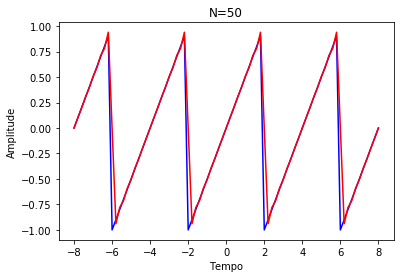

In [203]:
# N=50
x_50 = x_N(50)
X_50 = [x_50(t) for t in T]

plt.title("N=50")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
go4 = plt.plot(T, x, 'b')
g4 = plt.plot(T, X_50, 'r')

É visível como a aproximação pela série melhora com o aumento do número de harmônicas.

##### (d) Erros

Média de $(x(t) - x_n(t))^2$ para:

N=1

In [204]:
np.mean((x-X_1)**2)

0.13402119711494892

N=10

In [205]:
np.mean((x-X_10)**2)

0.05409949791757557

N=20

In [206]:
np.mean((x-X_20)**2)

0.050720720646376755

N=50

In [207]:
np.mean((x-X_50)**2)

0.04960819147251429

Nota-se que o erro se reduz a menos da metade de N=1 para N=10, mas ele se altera relativamente pouco de N=20 para N=50 (menos de 2% de redução).

##### (e) Domínio da Frequência

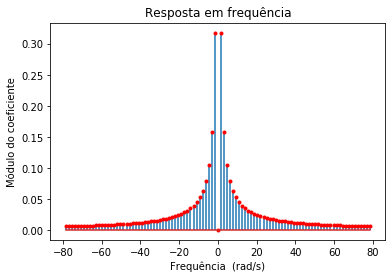

In [208]:
#dominio
K = np.linspace(-50, 50, 101)
W = w0*K
#coeficientes
A_k = [np.abs(a_k(k)) for k in K]
plt.title("Resposta em frequência")
plt.xlabel("Frequência  (rad/s)")
plt.ylabel("Módulo do coeficiente")
ga = plt.stem(W, A_k, markerfmt='r.', linefmt=None, label="Coeficientes", use_line_collection=True)

Pela simetria do gráfico, $a_k = a_{-k}  \forall k$ e, consequentemente, a parte imaginária de toda exponencial complexa é anulada, pois cada uma é somada com sua conjugada.\
\
Isso é esperado na representação de um sinal real.

##### (f) Resposta em frequência de circuito RC

Módulo da resposta em frequência, com a frequência de corte destacada em vermelho:
\
\
\
OBS:
\
Para evitar divisão por zero, definiu-se a resposta para frequência nula como zero.

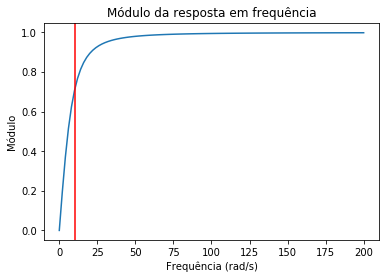

In [209]:
R = 100e3 
c = 1e-6
w_c = 1/(R*c)

#dominio
W = np.linspace(0, 200, 101)
h = lambda w: 1/(1-1j*(w_c/w)) if w!=0 else 0
H_mod = [np.abs(h(w)) for w in W]

plt.title("Módulo da resposta em frequência")
plt.xlabel("Frequência (rad/s)")
plt.ylabel("Módulo")
plt.plot(W,H_mod)
grc = plt.axvline(x=w_c, color = 'r')

Observa-se que frequências baixas (menores que 25 rad/s) são transmitidas com menor amplitude, ou seja, filtradas. Isso é esperado, pois o circuito é um filtro passa-alta.\
\
Fase da resposta em frequência:

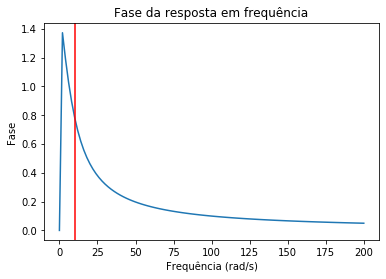

In [210]:
H_phase = [np.angle(h(w)) for w in W]

plt.title("Fase da resposta em frequência")
plt.xlabel("Frequência (rad/s)")
plt.ylabel("Fase")
plt.plot(W,H_phase)
grc = plt.axvline(x=w_c, color = 'r')

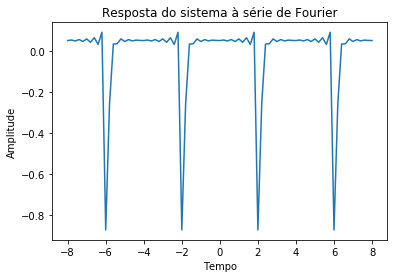

In [211]:
N = 50
y = lambda t : np.real(sum([h(k*w0)*a_k(k)*c_exp(k,t) for k in range(-N, N+1)]))
Y = [y(t) for t in T]

plt.title("Resposta do sistema à série de Fourier")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
gy = plt.plot(T,Y)

Observa-se que a atenuação das baixas frequências reduziu a amplitude positiva da onda, o que é coerente pois os maiores coeficientes acompanha-nas, e descaracterizou o formato de dente de serra, pois as menores frequências contribuiam para o formato "linear" da onda (verifica-se no N=1 como a menor frequência é a mais próxima do formato do sinal original).

##### (g) Comparação da resposta do sistema à onda original e à sua representação por série de Fourier
A resposta do sistema à onda original é similar à resposta à série de Fourier. A maior diferença observável é a presença do fenômeno de Gibbs nas descontinuidades, o que é esperado devido à representação. Outra diferença é a oscilação em torno do zero na resposta à série, provavelmente devido à "falta" das baixas frequências.